<h1><center>Customer Churn in Telecom</center></h1>

### Data Analysis with Pandas

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "C:/Users/Center/Downloads/telecom_churn_csv.csv"
dataframe = pd.read_csv(path)

#preview
dataframe.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Perform dimensionality checks, find out columns and obtain general information about the attributes.

In [2]:
# data dimensionality
dataframe.shape

(3333, 20)

In [3]:
# check column names
print(dataframe.columns, "\n")

# check general info about the df
dataframe.info()

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   

We notice that the `Churn` column is of boolean datatype. For further operations, we convert `Churn` from Bool to Int type and then obtain summary for the quantitative and qualitative attributes.

In [4]:
# converting 19th column, i.e. Churn to integer
dataframe['Churn'] = dataframe['Churn'].astype('int64')

In [5]:
# obtain a 5-point summary
display(dataframe.describe().transpose())

# include non-numeric elements
display(dataframe.describe(include = ['object', 'bool']))

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


    To understand the % of customers based on `Churn` value, we use `value_counts()` and normalize the output.

In [6]:
# categorical type values
dataframe['Churn'].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

85.5% of the total customers are *loyal* and a 14.5% churn is observed. Further, we can view the dataframe by `Churn` and `Total day charge` in ascending and descending order respectively.

In [7]:
# sorting the values
dataframe.sort_values(by = ['Churn', 'Total day charge'], ascending = [True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


**What are the average values of numerical features for churned users?**

In [8]:
# 1. 
dataframe[dataframe['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

**How much time (on average) do churned users spend on the phone during daytime?**

In [9]:
# 2.
dataframe.groupby(['Churn'])['Total day minutes'].mean()

Churn
0    175.175754
1    206.914079
Name: Total day minutes, dtype: float64

Customers who discontinue the telecom service usually spend 206-207 minutes during daytime on an average compared to the ones who remain loyal spending an average 175 minutes.

**What is the maximum length of international calls among loyal users (Churn == 0) who don't have an international plan?**

In [10]:
# 3.
print("Max international min. (loyal customers w/o international plan): ", dataframe[(dataframe['Churn'] == 0) & (dataframe['International plan'] == 'No')]['Total intl minutes'].max())
print("Max international min. (churned customers w/o international plan): ",dataframe[(dataframe['Churn'] == 1) & (dataframe['International plan'] == 'No')]['Total intl minutes'].max())
print("Max international min. (loyal customers w international plan): ",dataframe[(dataframe['Churn'] == 0) & (dataframe['International plan'] == 'Yes')]['Total intl minutes'].max())
print("Max international min. (churned customers w international plan): ",dataframe[(dataframe['Churn'] == 1) & (dataframe['International plan'] == 'Yes')]['Total intl minutes'].max())

Max international min. (loyal customers w/o international plan):  18.9
Max international min. (churned customers w/o international plan):  18.3
Max international min. (loyal customers w international plan):  13.0
Max international min. (churned customers w international plan):  20.0


Customers with / without an International plan spend almost similar minutes on international call. However, it seems customers who spent a higher time on international calls with international plans churn out. This is indicative of a non-customer friendly international plan by the telecom.

In [11]:
# view 1st and last rows
display(dataframe[:1])
display(dataframe[-1:])

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


**Applying Functions to Cells, Columns and Rows**
<br>
apply()

In [12]:
# apply function on columns
dataframe.apply(np.max)

# apply function on rows by including axis = 1

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

**Lambda function**
<br> <br>
Display all states starting with 'W'.

In [13]:
dataframe[dataframe['State'].apply(lambda state: state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


**Map function**
<br> <br>
The `map` method is used to replace values in a column by passing a dictionary of the form {old_value : new_value} as its argument.

In [14]:
d = {'No': False, 'Yes': True}
dataframe['International plan'] = dataframe['International plan'].map(d)
dataframe.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Convert No and Yes to boolean values through `map()` for `International plan`.


**Replace function**
<br><br>
Use `replace()` to perform the same conversion task for `Voice mail plan` 

In [15]:
dataframe = dataframe.replace({'Voice mail plan': d})
dataframe.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Grouping**
<br><br>
Use `groupby()` on `Churn` to calculate mean, standard deviation, minimum and maximum values of `Total day minutes`, `Total eve minutes` and `Total night minutes`.

In [16]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
dataframe.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

**Crosstab function**
<br><br>
Generate contingency tables for `Churn` and `Interational plan`, `Churn` and `Voice mail plan`.

In [17]:
display(pd.crosstab(dataframe['Churn'], dataframe['International plan']))
display(pd.crosstab(dataframe['Churn'], dataframe['Voice mail plan'], normalize = True))

International plan,False,True
Churn,,
0,2664,186
1,346,137


Voice mail plan,False,True
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


**Pivot function**
<br>
The `pivot_table` method takes the following parameters:

* `values` – a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.
<br>

**What is the average number of day, evening, and night calls by area code?**

In [18]:
dataframe.pivot_table(values = ['Total day calls', 'Total eve calls', 'Total night calls'], index = ['Area code'], aggfunc = 'mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


**Inserting / deleting columns**
<br><br>
Using `insert()` and `drop()` to perform insertion and deletion of columns.

In [19]:
total_charge = dataframe['Total day charge'] + dataframe['Total eve charge'] + \
                dataframe['Total night charge'] + dataframe['Total intl charge']
dataframe.insert(loc = len(dataframe.columns), column = "Total charge", value = total_charge)
dataframe.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


In [20]:
dataframe['Total calls'] = dataframe['Total day calls'] + dataframe['Total eve calls'] + \
              dataframe['Total night calls'] + dataframe['Total intl calls']
dataframe.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,75.56,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,59.24,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,62.29,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,66.80,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,52.09,359


In [21]:
dataframe.drop(['Total calls', 'Total charge'], axis = 1, inplace = True)

# axis = 0
dataframe.drop([1,2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


**How many customers who opted/churned out of International plan remain loyal vs exit the telecom?**

Plot bar chart for the same.

In [22]:
pd.crosstab(dataframe['Churn'], dataframe['International plan'], margins = True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


<AxesSubplot:xlabel='International plan', ylabel='count'>

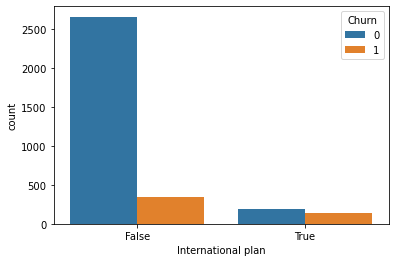

In [23]:
sns.countplot(x = 'International plan', hue = 'Churn', data = dataframe)

Higher churn rate observed among customers who opted for international plan. Further, plotting a contingency matrix and then bar chart.

In [24]:
pd.crosstab(dataframe['Churn'], dataframe['Customer service calls'], margins = True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

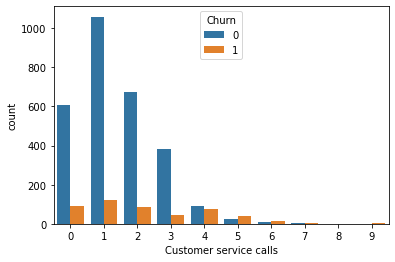

In [25]:
sns.countplot(x = 'Customer service calls', hue = 'Churn', data = dataframe)

Churn rate increases after 4 customer service calls in comparison to no customer churns. <br>


Adding new column to check for `Customer service calls > 3` to check for churn rate.

In [26]:
dataframe['Multiple_service_calls'] = (dataframe['Customer service calls'] > 3).astype('int64')
pd.crosstab(dataframe['Multiple_service_calls'], dataframe['Churn'], margins = True)

Churn,0,1,All
Multiple_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


<AxesSubplot:xlabel='Multiple_service_calls', ylabel='count'>

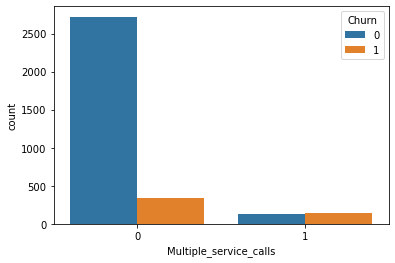

In [27]:
sns.countplot(x = 'Multiple_service_calls', hue = 'Churn', data = dataframe)

Another contingency table is created that relates `Churn` to `International plan` and `Multiple_service_calls`

In [28]:
pd.crosstab(dataframe['Multiple_service_calls'] & dataframe['International plan'], \
            dataframe['Churn'], margins = True)

Churn,0,1,All
row_0,,,
False,2841,464,3305
True,9,19,28
All,2850,483,3333


While predicting that a customer is not loyal (Churn=1) in the case when the number of calls to the service center is greater than 3 and the International Plan is added (and predicting Churn=0 otherwise), we expect an accuracy of 85.8% (we are mistaken only 473 times).
<br>

* A basic model will guess 'loyal customers' in about 85.5% of all cases
* Using *Customer Service calls > 3 & International plan = True implies Churn = 1, else Churn = 0* as basic condition for a simple model, we can predict 'loyal customers' with an accuracy of 85.8% which is 0.5% better than the basic model.

### Univariate Visualization

Focusing 1 feature at a time, predominantly in the ditribution of its values.

Quantitative Features: Use histograms and density plots to look at the distribution of a numerical variable. 

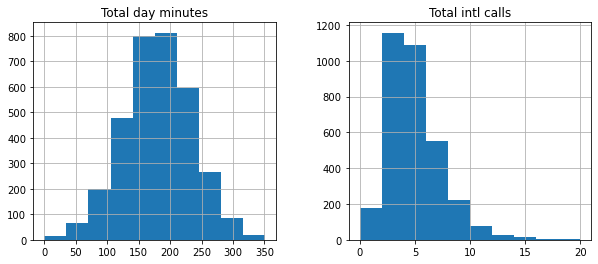

In [29]:
features = ['Total day minutes', 'Total intl calls']
dataframe[features].hist(figsize = (10,4));

We observe a right skew for Total intl calls. We can use kernel density plots to obtain smoothed version of histogram which are independent of the size of the bins.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

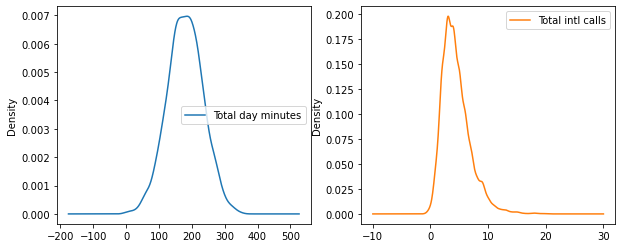

In [30]:
dataframe[features].plot(kind = 'density', subplots = True, layout = (1, 2)\
                        , sharex = False, figsize = (10,4))

We can use Boxplots to help get an idea about the presence outliers for every feature.

<AxesSubplot:xlabel='Total intl calls'>

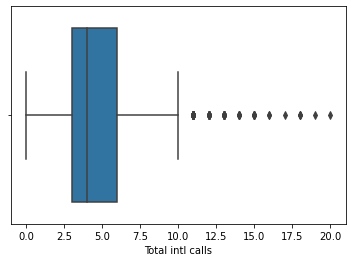

In [31]:
sns.boxplot(x = 'Total intl calls', data = dataframe)

Notice that there are many outliers hence, a large number of them are plotted in the above graph.

Plotting the customer service calls categorical variable might help us in identifying any specific customer behavior for higher feature?

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

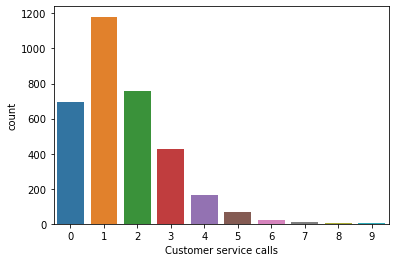

In [32]:
sns.countplot(x = 'Customer service calls', data = dataframe)

Most of the issues are resolved in 1-3 calls, whereas the fewer dissatisfied customers are towards the right tail.

### Multivariate Visualization

Relationships between two or more different variables, in a single pictorial representation.<br>
**Quantitative vs Quantitative**<br>
>**Correlation matrix**<br>
Linear and logistic regression cannot handle highly correlated input variables well therefore we check for correlations among the numerical variables.

<AxesSubplot:>

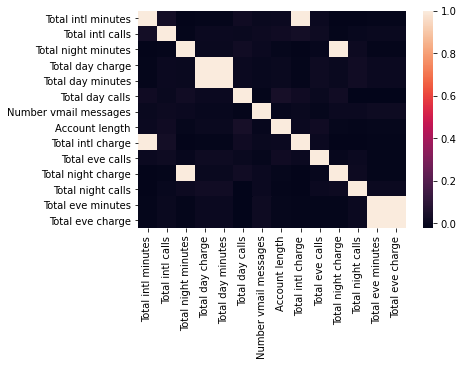

In [34]:
num = list(set(dataframe.columns) - set(['State', 'International plan', 'Voice mail', 'Area code', 'Churn', 'Customer service calls', 'Voice mail plan', 'Multiple_service_calls']))
corr_matrix = dataframe[num].corr()
sns.heatmap(corr_matrix)

`Total day charge`, `Total eve charge`, `Total night charge` and `Total intl charge` are variables that have high correlation with  variables storing the number of minutes spent on phone calls (`Total day minutes` etc.). Since these are dependent variables, they do not add information and therefore, dropped from the numerical feature list `num`.

In [35]:
num = list(set(num) - set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

>**Scatter plot**<br>
Is there a correlation between `Total day minutes` and `Total night minutes`?

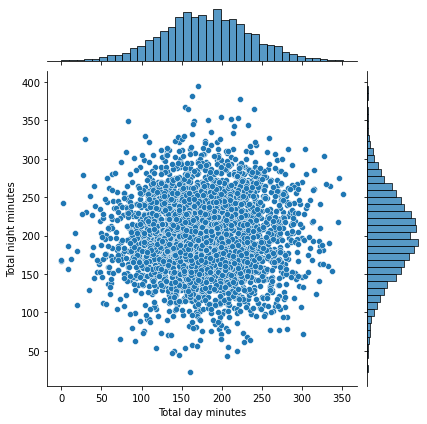

In [36]:
sns.jointplot(kind = 'scatter', x = 'Total day minutes', y = 'Total night minutes', data = dataframe)

The features follow a normal distribution. Also, there is no positive or negative linear association between the features since the ellipse-like shape is aligned with the axes.
<br><br>
>**Scatterplot matrix**<br>
plotting the correlation matrix to visually inspect the presence of correlated features.

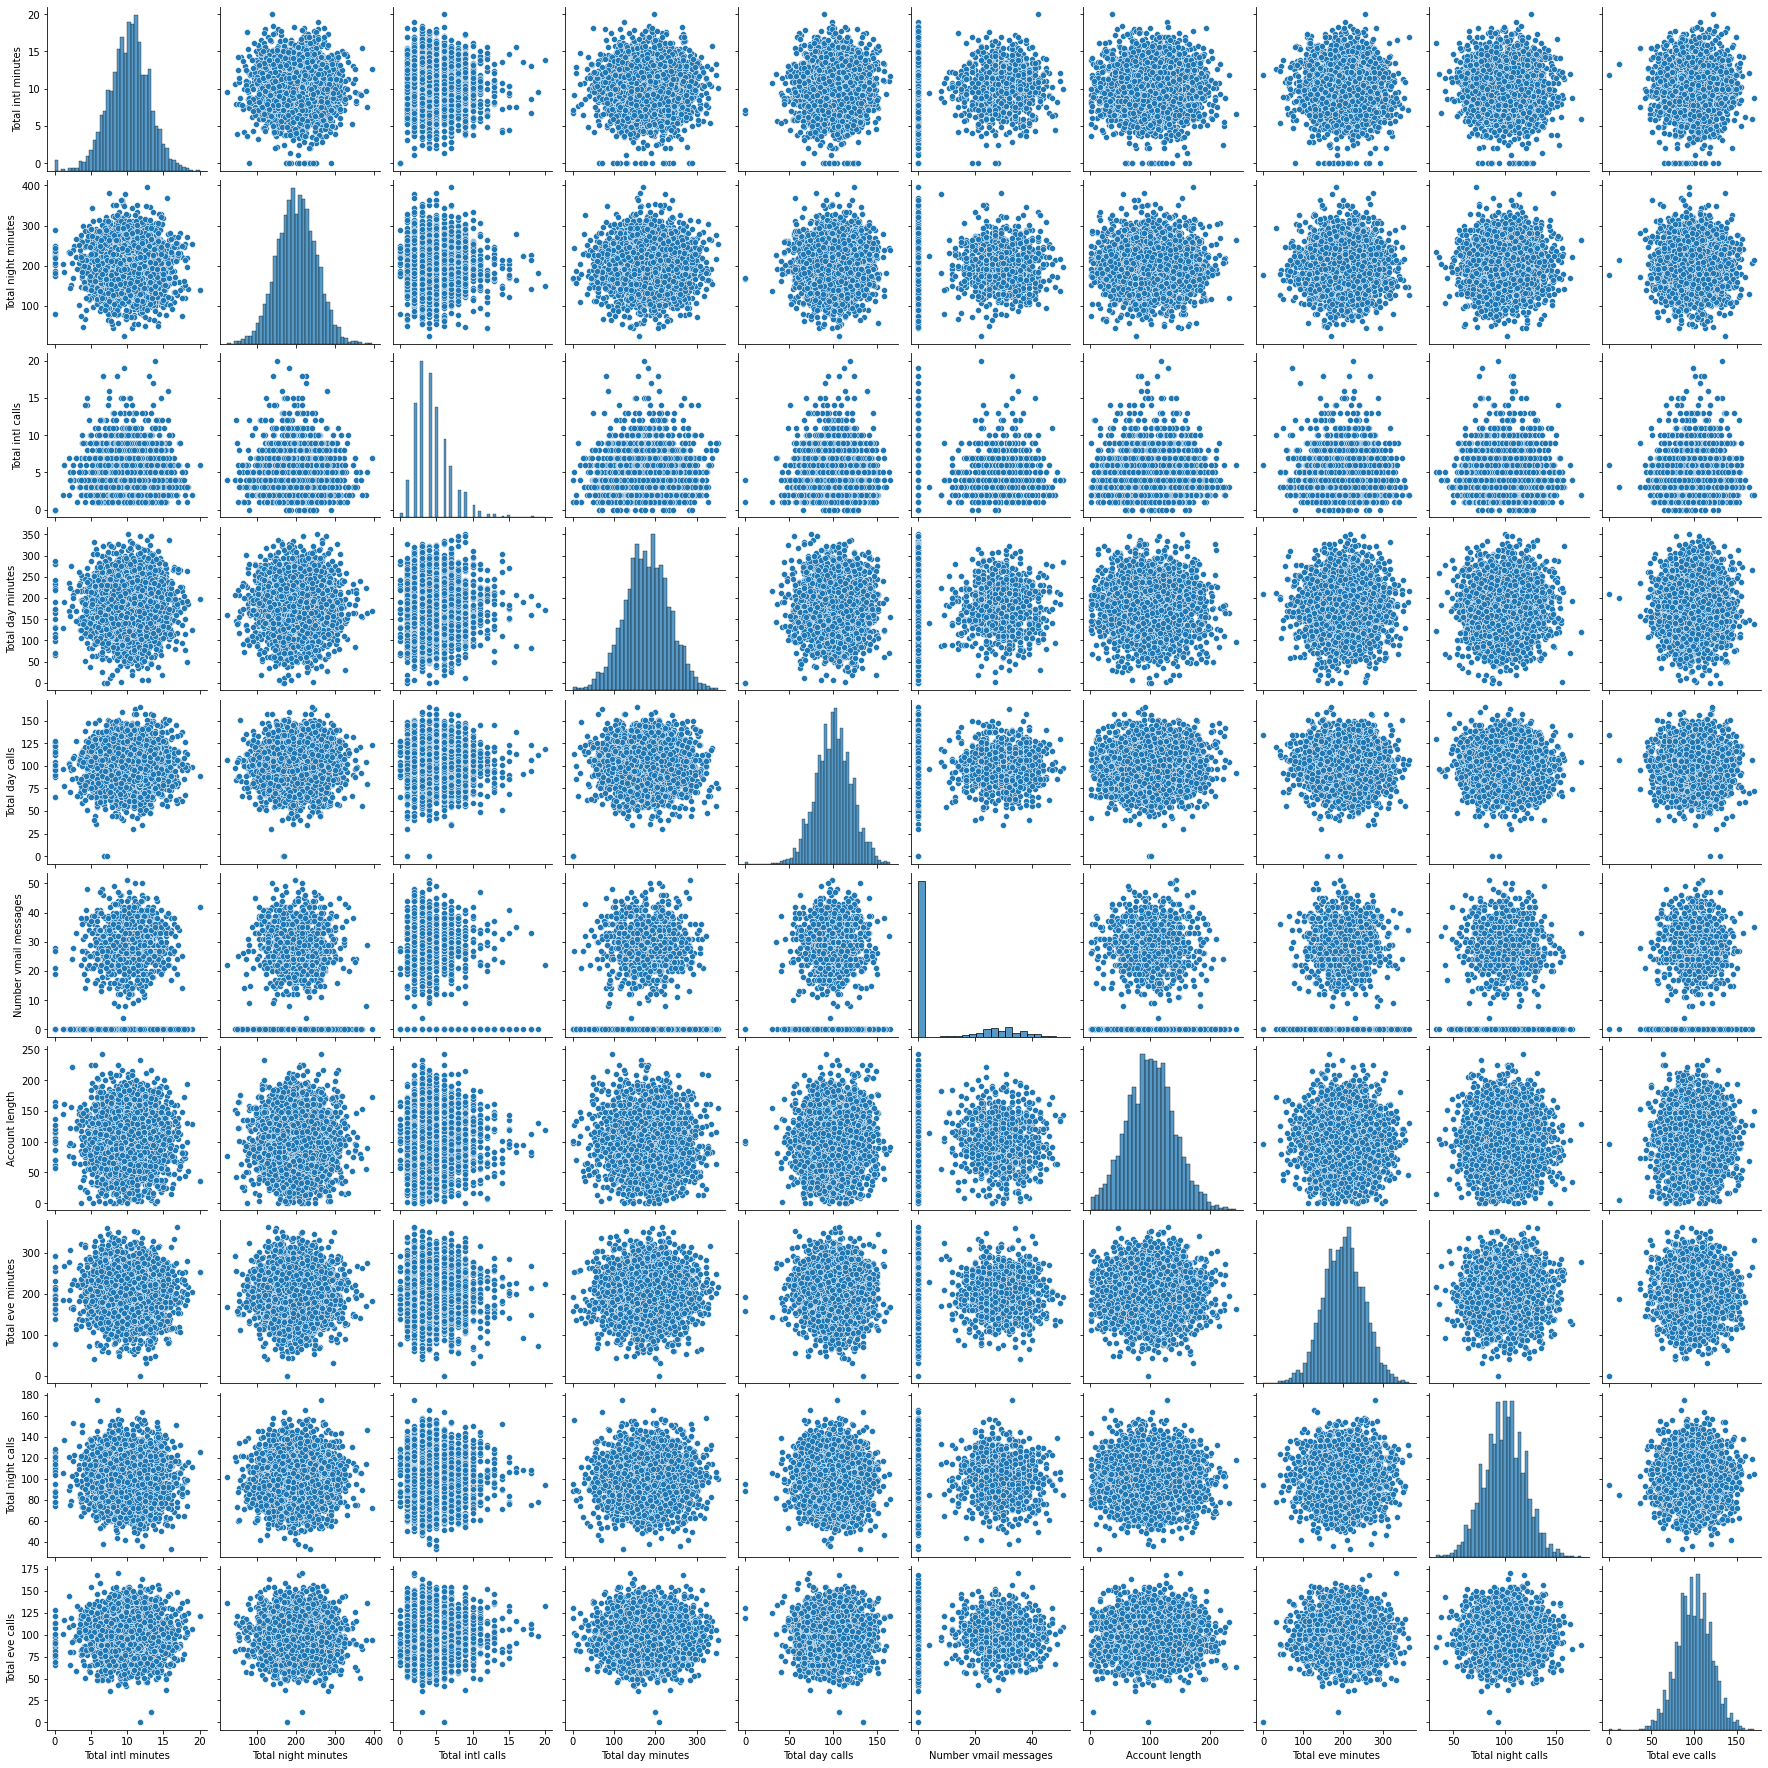

In [37]:
sns.pairplot(dataframe[num])

**Quantitative vs Categorical**<br>
Modfiying the previously created scatter plot with 3rd feature `Churn`.

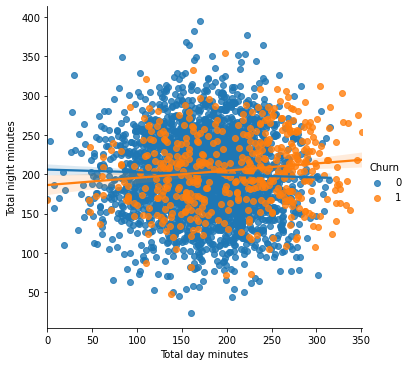

In [38]:
sns.lmplot(x = 'Total day minutes', y = 'Total night minutes', data = dataframe, hue = 'Churn', fit_reg = True)

The count of disloyal customers seem to increase since they tend to spend more time on the phone during both day and night.
<br><br>
**Boxplots for disjoint groups**<br>
We visualize the distribution statistics of numerical variables in two disjoint groups: loyal vs disloyal

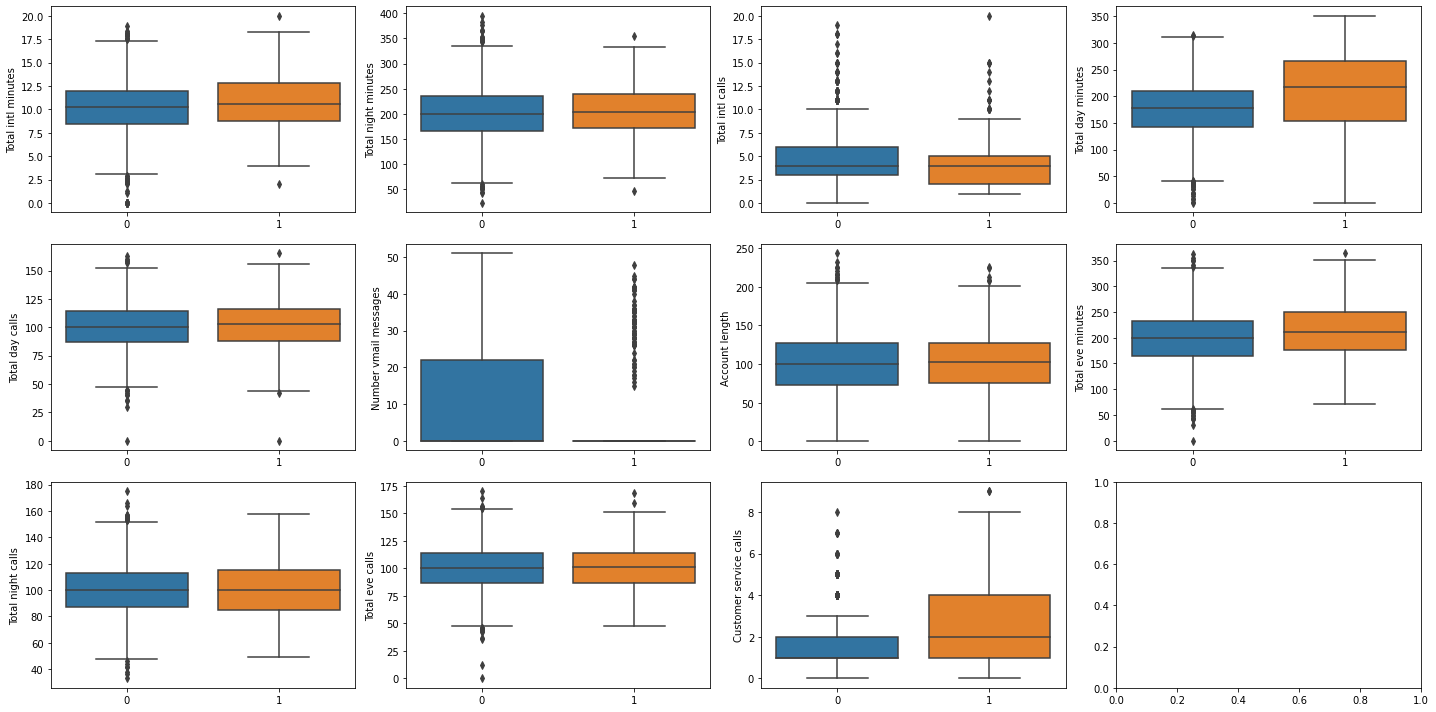

In [39]:
num.append('Customer service calls')

fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,10))
for idx, feat in enumerate(num):
    ax = axes[int(idx/4), idx%4]
    sns.boxplot(x = 'Churn', y = feat, data = dataframe, ax = ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout()

On average, customers that discontinue their contracts are more active users of communication services. They could be unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. 


**Catplot**<br>
For analysis of a quantitative variable in two categorical dimensions at once we use a function called `catplot()`. 

**How does the `Total day minutes` interact with `Churn` and `Customer service calls`?**

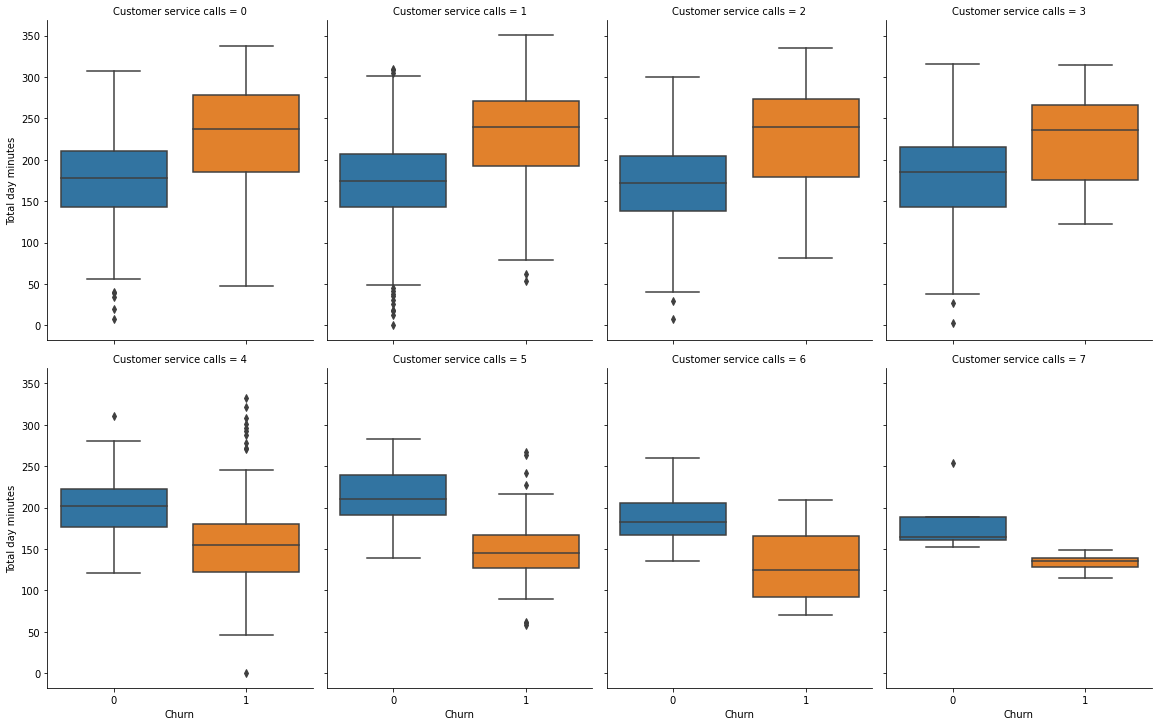

In [42]:
sns.catplot(x = "Churn", y = 'Total day minutes', col = 'Customer service calls', \
            data = dataframe[dataframe['Customer service calls'] < 8], kind = 'box', col_wrap = 4, height = 5, aspect = .8)

Starting with 4 calls, `Total day minutes` may no longer be the main factor for customer churn. There are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

**Categorical vs Categorical**<br>
To investigate the relationship between some ordinal features and the target variable like `Churn`.



**How is `Churn` related to `International plan` and `Voice plan` categorical variables?**

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

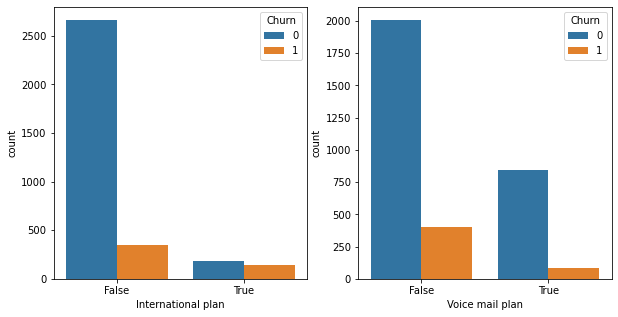

In [54]:
_,axes = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = 'International plan', hue = 'Churn', data = dataframe, ax = axes[0])
sns.countplot(x = 'Voice mail plan', hue = 'Churn', data = dataframe, ax = axes[1])

When International plan is enabled, the churn rate is much higher. Customers with Voice mail plans do not discontinue their subscription with the telecom provider.

In [65]:
pd.crosstab(dataframe['Churn'], dataframe['State'])
dataframe.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by = 'mean', ascending = False).transpose()

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


A high churn rate is observed in the states of New Jersey and California at 26% followed by Texas and Maryland at 25% and 24% respectively.